# Carbonate membership functions for sedimentation

In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [2]:
def plot_fuzzy_curve(bathy,law,label,color='Orange'):
    fig, ax0 = plt.subplots(figsize=(8, 4))
    ax0.plot(bathy, law, color, linewidth=4, label=label)
    lg = ax0.legend(loc=4)
    lg.draw_frame(False)
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('Sedimentation rate [m/yr]')
    plt.ylabel('Fuzzy value')
    plt.show()
    return

In [3]:
datafolder='../data/'

In [4]:
sed = np.linspace(0.0, 1.0, num=1000, endpoint=True)

# Low sedimentation MBF

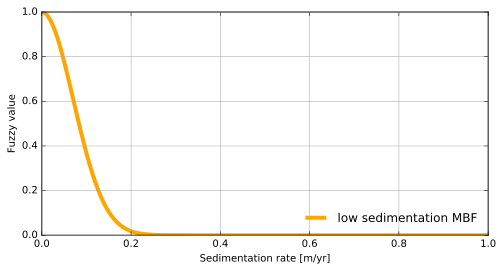

In [5]:
# Parameters
small_sed_sigma = 0.1
sedlow = fuzz.gaussmf(sed, 0, small_sed_sigma)

# Visualise fuzzy production curve
plot_fuzzy_curve(sed,sedlow,'low sedimentation MBF')

In [6]:
# Write membership function
nameCSV = 'mbf_low_sed'
df = pd.DataFrame({'X':sed,'Y':sedlow})
df.to_csv(str(datafolder)+str(nameCSV)+'.csv',columns=['X', 'Y'], sep=' ', index=False ,header=0)

# Medium sedimentation MBF

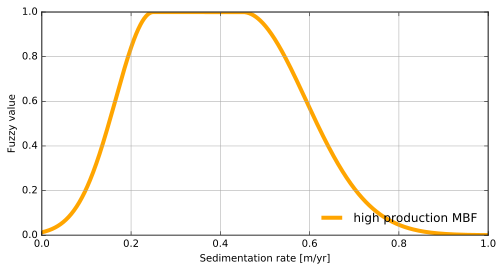

In [7]:
# Parameters
sed_sigma = 0.2
sedmed = fuzz.gaussmf(sed, 0.45, sed_sigma)
sed_sigma2 = 0.12
tmp_sed = fuzz.gaussmf(sed, 0.25, sed_sigma2)

id1 = np.where(sed<0.25)[0]
id2 = np.where(sed>0.45)[0]

sedmed[id1[-1]:id2[0]] = 1.
sedmed[:id1[-1]] = tmp_sed[:id1[-1]]

# Visualise fuzzy production curves
plot_fuzzy_curve(sed,sedmed,'high production MBF')

In [8]:
# Write membership function
nameCSV = 'mbf_medium_sed'
df = pd.DataFrame({'X':sed,'Y':sedmed})
df.to_csv(str(datafolder)+str(nameCSV)+'.csv',columns=['X', 'Y'], sep=' ', index=False ,header=0)

# High sedimentation MBF

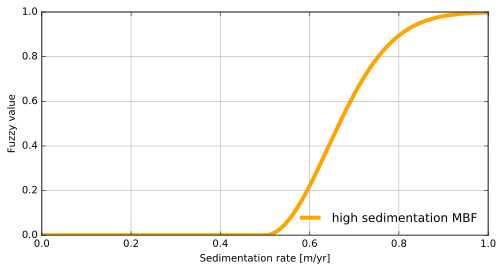

In [9]:
# Parameters
high_sed_sigma = 0.2
sedhigh = 1.-fuzz.gaussmf(sed, 0.5, high_sed_sigma)

id = np.where(sed<0.5)
sedhigh[id] = 0.

# Visualise fuzzy production curve
plot_fuzzy_curve(sed,sedhigh,'high sedimentation MBF')

In [10]:
# Write membership function
nameCSV = 'mbf_high_sed'
df = pd.DataFrame({'X':sed,'Y':sedhigh})
df.to_csv(str(datafolder)+str(nameCSV)+'.csv',columns=['X', 'Y'], sep=' ', index=False ,header=0)